In [232]:
!pip install --quiet qiskit==0.39.5
#!pip install --quiet qiskit_aer
!pip install --quiet pylatexenc

https://medium.com/free-code-camp/an-overview-of-principal-component-analysis-6340e3bc4073

In [233]:
#!pip install --quiet qiskit_algorithms

# Classical Data Compression

In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [235]:
dataset_a=pd.read_csv("/kaggle/input/darwin-asif/data.csv")
#dataset = dataset_a.iloc[:, :4]
dataset_a=dataset_a.drop(['ID'],axis=1,inplace=False)
#dataset_a=dataset_a.drop(['nameDest','nameOrig','isFlaggedFraud'],axis=1,inplace=False)
dataset_a.dropna()
#dataset_a=dataset_a.sample(n=6000, random_state=42)  
dataset_a.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [236]:
# Initialize the label encoder
label_encoder = LabelEncoder()
# Iterate over columns and apply LabelEncoder to categorical columns
for column in dataset_a.columns:
    # Check if the column is categorical (string type or object type)
    if dataset_a[column].dtype == 'object':
        dataset_a[column] = label_encoder.fit_transform(dataset_a[column])

In [237]:
dataset_a.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


In [238]:
dataset = dataset_a.iloc[:, :450]
#dataset = dataset_a.iloc[:, 1:]
dataset.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [239]:
y = dataset_a.iloc[:, 450]
unique_values = dataset_a.iloc[:, 450].unique()
print(unique_values)

[1 0]


In [240]:
chi_ls = []

for feature in dataset.columns:
    
    # create contingency table
    c = pd.crosstab(y, dataset[feature])
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

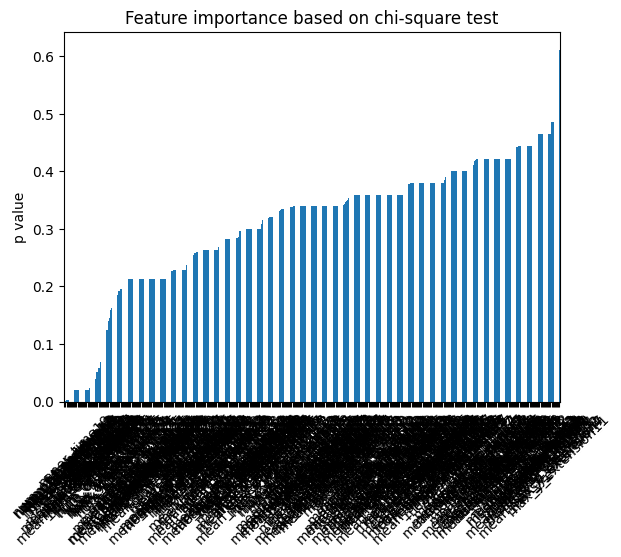

In [241]:
import matplotlib.pyplot as plt
pd.Series(chi_ls, index=dataset.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [242]:
# select top 4

selected = pd.Series(chi_ls, index=dataset.columns).sort_values(
    ascending=True)[0:4].index

selected

Index(['num_of_pendown23', 'num_of_pendown19', 'num_of_pendown18',
       'num_of_pendown4'],
      dtype='object')

In [243]:
dataset=dataset[selected]
dataset.head()

,num_of_pendown23,num_of_pendown19,num_of_pendown18,num_of_pendown4
0,12,43,3,11
1,14,82,6,5
2,12,42,4,1
3,11,78,6,9
4,12,53,4,9


In [244]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler with a feature range of 0 to 12
scaler = MinMaxScaler(feature_range=(0, 12))

# Fit and transform the DataFrame
dataset = scaler.fit_transform(dataset)


In [245]:
cov_matrix = np.cov(dataset, rowvar=False)

In [246]:
cov_matrix

array([[ 2.37921733, -0.13381383, -0.01106192,  0.58807213],
       [-0.13381383,  3.52295364,  0.19738526,  0.02362662],
       [-0.01106192,  0.19738526,  1.10229072,  0.00607774],
       [ 0.58807213,  0.02362662,  0.00607774,  1.64817239]])

In [247]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [248]:
eigenvalues

array([3.55542186, 2.69299246, 1.31798063, 1.08623913])

In [249]:
#eigenvectors

In [250]:
totalSum = sum(eigenvalues)
variablesExplained = [(i / totalSum) for i in sorted(eigenvalues, reverse = True)]

In [251]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [252]:
# Select the top k eigenvectors (principal components)
k = 2  # Number of components to keep
top_k_eigenvectors = eigenvectors[:, :k]


In [253]:
top_k_eigenvectors

array([[-0.1264419 ,  0.863594  ],
       [ 0.98838537,  0.12268213],
       [ 0.08003258,  0.01108573],
       [-0.02648753,  0.48890859]])

In [254]:
# Project the dataset onto the top k eigenvectors
reduced_data = np.dot(dataset, top_k_eigenvectors)

In [255]:
# Convert the reduced data to a DataFrame if needed
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(k)])

In [256]:
reduced_df.head()

,PC1,PC2
0,3.720831,3.349770
1,8.202763,4.847137
2,3.655215,2.564634
3,8.015070,3.024408
4,4.926426,3.344143


In [257]:
reduced_df=np.array(reduced_df)

In [258]:
X = reduced_df  # Features

In [259]:
data_c = pd.DataFrame(reduced_df, columns=['Feature1', 'Feature2'])
data_c['Label'] = y  # Add the labels as a new column

In [260]:
# Save the DataFrame to a CSV file
data_c.to_csv('pca_based_reduced_features_with_labels_darwin.csv', index=False)


In [261]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
# Initialize and train the Support Vector Classifier
model = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', or 'sigmoid'
model.fit(X_train, y_train)

SVC(kernel='linear')

In [263]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [264]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_test=encoder.fit_transform(y_test)
y_pred=encoder.fit_transform(y_pred)

print(y_test[:5])  # Check the first few values
print(y_pred[:5])  # Check the first few values

[0 0 0 0 0]
[1 0 0 0 1]


In [265]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_pred)
print(f"AUC: {auc}")

AUC: 0.7250000000000001


In [266]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.81      0.65      0.72        20

    accuracy                           0.71        35
   macro avg       0.72      0.73      0.71        35
weighted avg       0.73      0.71      0.72        35



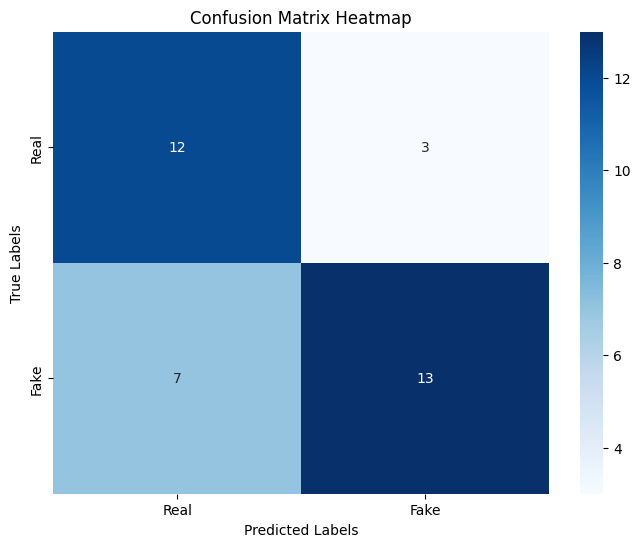

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['Real', 'Fake'] 

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# qPCA

One can improve the accuracy of the algorithm increasing the resolution parameter and the number of shots

In [268]:
import numpy as np
import pandas as pd
import itertools

from qiskit import Aer,transpile, QuantumRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.algorithms.linear_solvers.matrices.numpy_matrix import NumPyMatrix
from qiskit.circuit.library import PhaseEstimation
from qiskit.circuit.library.standard_gates import RYGate
from qiskit.circuit.library.data_preparation import StatePreparation


In [269]:
example_matrix = np.array(cov_matrix)

In [270]:
def Generate_matrix(example_matrix):

    #if replicate_paper == False:
        # Generate hermitian matrix
        #random_matrix=np.random.rand(matrix_dimension, matrix_dimension) 
    #hermitian_matrix=np.dot(example_matrix, example_matrix.T)

    eig, e_v = np.linalg.eig(example_matrix)
        
    eig_values_list = np.array(eig)

    example_matrix = e_v @ np.diag(eig_values_list) @ e_v.T
    
    norm_factor = np.trace(example_matrix)
    normalized_example_matrix = example_matrix/norm_factor

    print(f'Matrix:\n {example_matrix.round(2)}\n')
    for eigenval, eigenvec in zip(np.linalg.eig(example_matrix)[0][::-1], np.rot90(np.linalg.eig(example_matrix)[1])):
        print(f'eigenvalue: {eigenval:.0f} - eigenvector: {eigenvec.round(3)}')
    return normalized_example_matrix, norm_factor

In [271]:
def thetas_computation(example_matrix, debug = False):
    """
    For a generic matrix, the corrisponding quantum state is generated through a binary tree, whose internal nodes store the amplitudes of the state. 
    The following function extract thetas,through binary tree calculation, used to construct the quantum circuit employed to encode the original information in qubits.  

    Input parameters: 
        -   example_matrix: generic matrix as numpy matrix.
    Output :
        - thetas : list of computed thetas.
        - all_combination: list combination of base state vectors.
    """
    lst_combination=[]
    
    #1 STEP: INPUT_PROBABILITIES COMPUTATION
    sum_squares = (example_matrix**2).sum()
    input_probabilities = (example_matrix**2/sum_squares).flatten()

    #2 STEP: BINARY TREE - NODES COMPUTATION
    for k in range(1, int(np.ceil(np.log2(len(example_matrix)**2)))+1):
        lst_combination.append(list(map(list, itertools.product([0, 1], repeat=k))))
    container=[]
    for lst in lst_combination:
        container.append([''.join([''.join(str(j)) for j in i]) for i in lst])
    all_combinations=[item for c in container for item in c]

    general_bitstring=[''.join([''.join(str(j)) for j in i]) for i in list(map(list, itertools.product([0, 1], repeat=int(np.ceil(np.log2(len(example_matrix)**2))))))][:len(input_probabilities)]
    
    #Nodes contains all the values of the tree (except for the root)
    nodes=[]
    for st in all_combinations:
        #print(st)
        starts = [general_bitstring.index(l) for l in general_bitstring if l.startswith(st)]
        #print(starts)
        if debug == True:
            print(st,'->',np.sqrt(input_probabilities[starts].sum()))
        nodes.append(np.sqrt(input_probabilities[starts].sum()))
    
    #add root tree
    nodes.insert(0, 1)
    
    #3 STEP: BINARY TREE - THETAS COMPUTATION
    thetas=[]

    idx=0
    for i in range(1,len(nodes),2):
        
        right_node=i
        left_node=right_node+1
        if nodes[idx]!=0:
            thetas.append(2*np.arccos(nodes[right_node]/nodes[idx]))
            thetas.append(2*np.arcsin(nodes[left_node]/nodes[idx]))
        else:
            thetas.append(0)
            thetas.append(0)

        idx+=1
    return thetas, all_combinations

In [272]:
def generate_qram_circuit(thetas, all_combinations, example_matrix):
    """
    For a generic matrix, the corrisponding qram circuit for matrix preprocessing into corrisponding quantum state. 

    Input parameters: 
        - example_matrix: generic matrix as numpy matrix.
        - thetas : list of computed thetas.
        - all_combination: list combination of base state vectors.
    Output :
        - qc : preprocessing circuit.
    """
    right_nodes_indexes=list(range(0,len(thetas),2))
    rotations_list=list(zip(np.array(all_combinations)[right_nodes_indexes],np.array(thetas)[right_nodes_indexes]))

    qc=QuantumCircuit(int(np.ceil(np.log2(len(example_matrix)**2))))

    for r_l in rotations_list:
        target_qubit=len(r_l[0])-1
        
        #First case of R_0
        if target_qubit==0:
            qc.ry(theta=r_l[1],qubit=target_qubit)
            continue
            
        not_gate=[]
        for qb in range(target_qubit):
            if r_l[0][qb]=='0':
                not_gate.append(qb)
                
        c_t_qubits=list(range(len(r_l[0])))
        n_controls=len(range(target_qubit))
        
        if len(not_gate)>0:
            qc.x(not_gate)
            c_ry = RYGate(r_l[1]).control(n_controls)
            qc.append(c_ry, c_t_qubits)
            qc.x(not_gate)
        else:
            c_ry = RYGate(r_l[1]).control(n_controls)
            qc.append(c_ry, c_t_qubits)
    return qc

In [273]:
def phase_estimation(matrix, qram_circuit, resolution):
    """
    For a generic 2**n matrix, the corrisponding Quantum Phase Estimation for integer eigenvalues extraction 

    Input parameters: 
        - matrix: generic matrix as numpy matrix ( 2^N shape )
        - qram_circuit: preprocessing circuit
        - replicate_paper: boolean parameter, recreate 2x2 matrix used in reference paper
        - eigval_list: list of eigenvalues generated for testing purposes
    Output :
        - resolution: number of qubits used to represent the computed eigenvalues
        - pe : phase estimation circuit
    """

    #Unitary Operator for PE
    u_circuit = NumPyMatrix(matrix, evolution_time=2*np.pi)

    #PE circuit
    pe = PhaseEstimation(resolution, u_circuit, name = "PE")

    num_qubit = resolution+int(np.ceil(np.log2(len(matrix)**2)))

    pe_register = QuantumRegister(num_qubit, 'total')

    pe_circuit = QuantumCircuit(pe_register)

    pe_circuit.append(qram_circuit.to_gate(), pe_register[resolution:])
    pe_circuit.append(pe.to_gate(), pe_register[0:pe.num_qubits])

    return pe_circuit

In [274]:
def check_statevector(backend, pe_circuit, resolution, example_matrix):
    pe_job = backend.run(transpile(pe_circuit, backend=backend))
    statevector = np.asarray(pe_job.result().get_statevector()).round(3)

    bitstrings = [''.join([''.join(str(j)) for j in i]) for i in list(map(list, itertools.product([0, 1], repeat=resolution+len(example_matrix))))]
    statevector_dict = {}
    for bitstring, amplitude in zip(bitstrings, statevector):
        statevector_dict[bitstring] = amplitude
    return statevector_dict

In [275]:
from scipy.signal import find_peaks

def eigen_estimation(probabilities, sign_dictionary, resolution, debug=False):
    """
    Estimate eigenvalues and eigenvectors from the input matrix and the relative output of state tomography 

    Input parameters: 
        - probabilities: the probabilities for each state obtained from tomography
        - sign dictionary: the signs of the reconstructed (via tomography) statevector
        - resolution: number of qubits used to represent the computed eigenvalues
    Output :
        - eigenvalues: eigenvalues of the input matrix
        - eigenvectors: eigenvectors of the input matrix
    """

    df = pd.DataFrame.from_dict(probabilities, orient='index')
    df.reset_index(inplace=True)
    df.columns=['state', 'module']

    df['lambda']=df['state'].apply(lambda x: x[-resolution:])
    df1=df.groupby('lambda').agg({'module':'sum'})
    #df1['module_new']=df1['module'].apply(lambda x: np.sqrt(x.real**2 + x.imag**2))
    df1=df1.sort_values('module',ascending=False)
    df1.reset_index(inplace=True)
    df1['num']=df1['lambda'].apply(lambda x :int(x[::-1],base=2)/(2**resolution))

    peaks=[]
    nums_peaks=[]

    for i in find_peaks(df1.sort_values(['num'])['module'], threshold=0.001)[0]:
        el = df1.sort_values(['num']).iloc[i]
        nums_peaks.append(el['num'])
        peaks.append(el['lambda'])

    if debug == True:
        print(peaks, nums_peaks)
        df1[['num','module']].sort_values('num').set_index('num').plot(style='-*',figsize=(15,10))

    df.columns=['state','module','lambda']
    df['sign']=np.array(list(sign_dictionary.values()))
    df['module']=df['module'].multiply(np.array(list(sign_dictionary.values())), axis=0)
    df=df.fillna(0)

    a=[]
    save_sign=[]
    eigenvalues=[]
    for l in peaks:
        eigenvalues.append(int(l[::-1],base=2)/(2**resolution))
        a_=np.array(df.query("state.str.endswith(@l)")['module'].values)
        #print(a_)
        save_sign.append(np.sign(a_))
        #print(save_sign)
        
        a.append(np.sqrt(abs(a_)))

    #a=[a1,a2]

    for i in range(len(a)):
        # print(a[i])
        normalization_factor=np.sqrt((1/(sum(a[i]**2))))
        # print(normalization_factor)
        a[i]*=normalization_factor
        a[i]*=save_sign[i]

    len_eigenvector = len(list(probabilities.keys())[0])-resolution
    eigenvectors=[]
    for ll, eig in zip(a, eigenvalues):
        
        eigenvector=np.zeros(len_eigenvector) #put length of eigenvector
        save_sign=np.sign(ll)
        sv=abs(ll)
        max_list=[]
        scaled_statevectors=[]
        for e,i in enumerate(range(0,len(sv), len_eigenvector)):
            max_list.append(max(sv[i:i+len_eigenvector]))
            scaled_statevectors.append(sv[i:i+len_eigenvector]/max_list[e])
            #print(max_list,scaled_statevectors)
        idx_max=np.argmax(max_list)
        #print(idx_max)
        max_max=max_list[idx_max]
        #print(max_max)
        value=np.sqrt(max_max)
        #eigenvector=scaled_statevectors[idx_max]*value*save_sign[:len(example_matrix)]
        eigenvector=scaled_statevectors[idx_max]*value*save_sign[len_eigenvector*idx_max:len_eigenvector*idx_max+len_eigenvector]
        eigenvectors.append((eig, eigenvector))

    return eigenvectors

In [276]:
def sign_estimation(pe_circuit, probabilities, n_shots):
    """
    Estimate signs for the circuit's statevector

    Input parameters: 
        - pe_circuit: circuit that performs phase estimation
        - probabilities: the probabilities for each state obtained from tomography
        - n_shots: number of shots
    Output :
        - sign_dictionary: dictionary containing the signs
    """

    # Create the first operator for tomography
    pe_circuit.remove_final_measurements()
    op_U = pe_circuit.to_gate(label='op_U').control()
    #Create the second operator for tomography
    op_V = StatePreparation(np.sqrt(list(probabilities.values())),label='c_V').control()

    qr_target = QuantumRegister(pe_circuit.num_qubits, 'target')
    qr_control = QuantumRegister(1, 'control_qubit')

    sign_estimation_circuit = QuantumCircuit(qr_target, qr_control, name='sign_estimation')
    sign_estimation_circuit.h(qr_control)
    sign_estimation_circuit.x(qr_control)

    sign_estimation_circuit.append(op_U, qr_control[:]+qr_target[:])
    sign_estimation_circuit.x(qr_control)
    sign_estimation_circuit.append(op_V, qr_control[:]+qr_target[:])
    sign_estimation_circuit.h(qr_control)
    sign_estimation_circuit.measure_all()

    backend_simulation = Aer.get_backend("qasm_simulator")
    job_for_sign = backend_simulation.run(transpile(sign_estimation_circuit, backend=backend_simulation), shots=n_shots)
    counts_for_sign = job_for_sign.result().get_counts()

    #Take only counts with control qubits equal to 0
    tmp=np.zeros(2**pe_circuit.num_qubits)
    for c in counts_for_sign:
        if c[0]=='0':
            tmp[int(c[1:],2)]=counts_for_sign[c]

    #Sign estimation
    sign_dictionary={}
    sign=0
    for e, (count, prob) in enumerate(zip(tmp, probabilities.values())):
        if count>0.4*prob*n_shots:
            sign=1
        else:
            sign=-1
        if prob==0:
            sign=1
        sign_dictionary.update({bin(e)[2:].zfill(pe_circuit.num_qubits):sign})
    
    return sign_dictionary

In [277]:
# Desired eigenvalues for the synthetic matrix
example_matrix, norm_factor = Generate_matrix(example_matrix)

Matrix:
 [[ 2.38 -0.13 -0.01  0.59]
 [-0.13  3.52  0.2   0.02]
 [-0.01  0.2   1.1   0.01]
 [ 0.59  0.02  0.01  1.65]]

eigenvalue: 1 - eigenvector: [-0.007  0.08  -0.997  0.015]
eigenvalue: 1 - eigenvector: [ 0.488  0.04  -0.013 -0.872]
eigenvalue: 3 - eigenvector: [0.864 0.123 0.011 0.489]
eigenvalue: 4 - eigenvector: [-0.126  0.988  0.08  -0.026]


In [278]:
# Preprocessing circuit
thetas, all_combinations = thetas_computation(example_matrix, debug = False)
matrix_circuit = generate_qram_circuit(thetas, all_combinations, example_matrix)
#matrix_circuit.draw("mpl")

In [279]:
#Check matrix encoding into quantum state
backend = Aer.get_backend("statevector_simulator")
job = backend.run(transpile(matrix_circuit, backend=backend))
job.result().get_counts()

{'0000': 0.248163970085093,
 '0001': 5.364532337e-06,
 '0010': 0.000785005178439,
 '0011': 0.015161134514166,
 '0100': 5.364532337e-06,
 '0101': 0.053267559721977,
 '0110': 0.001708047506836,
 '0111': 1.619404625e-06,
 '1000': 0.000785005178439,
 '1001': 0.001708047506836,
 '1010': 0.544107053317306,
 '1011': 2.4472231804e-05,
 '1100': 0.015161134514166,
 '1101': 1.619404625e-06,
 '1110': 2.4472231804e-05,
 '1111': 0.119090130139208}

In [280]:
# Create and Add Phase estimation block to circuit
resolution = 8
pe_circuit = phase_estimation(example_matrix, matrix_circuit, resolution)

/tmp/ipykernel_35/785524730.py:16: DeprecationWarning: The NumPyMatrix class is deprecated as of Qiskit Terra 0.22.0 and will be removed no sooner than 3 months after the release date. 
  u_circuit = NumPyMatrix(matrix, evolution_time=2*np.pi)


In [281]:
# Check that the circuit correctly estimates the eigenvalues 
# (only the states associated to the correct eigenvalues have probability amplitude different from 0)
# exact_statevector = check_statevector(backend,pe_circuit,resolution,example_matrix)
pe_circuit.measure_all()
# print(exact_statevector)
#pe_circuit.decompose(reps=1).draw("mpl")

In [282]:
# Run the circuit using qiskit simulator

n_shots = 80000 # Increase to achieve higher accuracy
backend_simulation = Aer.get_backend("qasm_simulator")
job = backend_simulation.run(transpile(pe_circuit, backend=backend_simulation), shots=n_shots)
counts = job.result().get_counts()
# plot_histogram(counts)

In [283]:
# Reconstruct the probabilities of observing each state from the counts provided by the simulation, plus perform the sign tomography
probabilities = {}

for i in range(2**pe_circuit.num_qubits):
    binary_i = bin(i)[2:].zfill(pe_circuit.num_qubits)
    try:
        # Will approximate the modulus two of the values seen in exact_statevector, two cells above
        probabilities[binary_i] = counts[binary_i]/n_shots
    except KeyError:
        probabilities[binary_i] = 0.0
        
sign_dictionary = sign_estimation(pe_circuit, probabilities, n_shots)

# Quantum Method Results

In [284]:
print("Quantum method results:")
result = eigen_estimation(probabilities, sign_dictionary, resolution, debug=False)
eigenvalues_q = []
eigenvectors_q= []
for eig, eigenvector in result:
    print(f'eigenvalue: {eig*norm_factor} - eigenvector: {np.real(eigenvector).round(3)}')
    eigenvalues_q.append(eig*norm_factor)
    eigenvectors_q.append(list(eigenvector))

Quantum method results:
eigenvalue: 1.0815792594246094 - eigenvector: [ 0.005 -0.081  0.998 -0.013]
eigenvalue: 1.3181747224237428 - eigenvector: [-0.483 -0.029  0.     0.87 ]
eigenvalue: 2.7039481485615235 - eigenvector: [ 0.865  0.122 -0.015  0.496]
eigenvalue: 3.548931944987 - eigenvector: [-0.127  0.939  0.078  0.016]


/tmp/ipykernel_35/2676622157.py:76: RuntimeWarning: invalid value encountered in divide
  scaled_statevectors.append(sv[i:i+len_eigenvector]/max_list[e])


In [285]:
eigenvalues_q

[1.0815792594246094, 1.3181747224237428, 2.7039481485615235, 3.548931944987]

# Reduced Matrix

In [286]:
# Function constructed from the scipy pca class
def transform(original_matrix, eigenvalues, components,select):

    # Ensure eigenvalues and components are NumPy arrays
    eigenvalues = np.array(eigenvalues)
    components = np.array(components)

    # Padding the eigenvalues
    #padded_eigenvalues = np.append(eigenvalues, 0)  # Add a zero eigenvalue

    # Padding the eigenvectors with a zero vector to match 4 components
    #zero_vector = np.zeros((1,components.shape[1]))
    #padded_eigenvectors = np.vstack((components, zero_vector))

    #eigenvalues= padded_eigenvalues 
    #components=padded_eigenvectors
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    components = np.array(components)[sorted_indices]

    top_k_eigenvectors_q = components[:, :select]

    newDataset = np.dot(original_matrix, top_k_eigenvectors_q)
    #X_transformed /= np.sqrt(eigenvalues)

    return newDataset

In [287]:
dataset_q=transform(dataset,eigenvalues_q,eigenvectors_q,2)

In [288]:
data_q = pd.DataFrame(dataset_q, columns=['Feature1', 'Feature2'])
data_q['Label'] = y  # Add the labels as a new column

In [289]:
# Save the DataFrame to a CSV file
data_q.to_csv('qpca_based_reduced_features_with_labels_darwin.csv', index=False)

print("CSV file 'reduced_features_with_labels.csv' created.")

CSV file 'reduced_features_with_labels.csv' created.


In [290]:
#dataset_q

# ML Model verification

In [291]:
X_q = np.array(dataset_q) # Features
y_q = np.array(y) # Target labels


In [292]:
# Split the dataset into training and test sets
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_q, y_q, test_size=0.2, random_state=42)

In [293]:
# Initialize and train the Support Vector Classifier
model_q = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', or 'sigmoid'
model_q.fit(X_train_q, y_train_q)

SVC(kernel='linear')

In [294]:
# Make predictions on the test set
y_pred_q = model_q.predict(X_test_q)

# Evaluate the model
accuracy = accuracy_score(y_test_q, y_pred_q)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [295]:
y_test_q=encoder.fit_transform(y_test_q)
y_pred_q=encoder.fit_transform(y_pred_q)

In [296]:
auc = roc_auc_score(y_test_q,y_pred_q)
print(f"AUC: {auc}")


AUC: 0.8083333333333333


In [297]:
print("\nClassification Report:")
print(classification_report(y_test_q, y_pred_q))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.88      0.75      0.81        20

    accuracy                           0.80        35
   macro avg       0.80      0.81      0.80        35
weighted avg       0.81      0.80      0.80        35



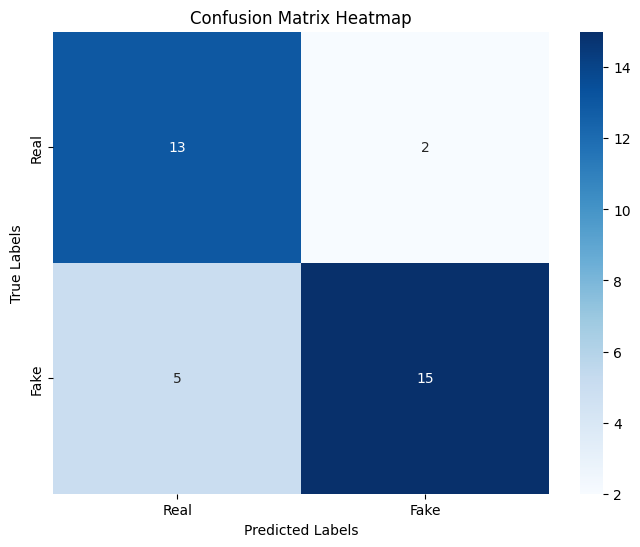

In [298]:
# Compute confusion matrix
cm_q = confusion_matrix(y_test_q, y_pred_q)
class_names = ['Real', 'Fake']

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_q, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()